In [1]:
import pandas as pd
import os
import numpy as np
import requests
from fredapi import Fred
import json
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, date
import pandas_datareader.data as web
import statistics as stats
import mplfinance as mpf

In [2]:
def format_date(date_string):
    try:
        month_number, year = date_string.split("-")
        month_name = datetime.strptime(month_number, "%m").strftime("%b")
        return f"{month_name} {year}"
    except ValueError:
        return "Invalid date format"

In [3]:
def finding_stock_info(ticker, beginning_year):
    year = int(beginning_year)
    stock = yf.Ticker(ticker)
    start = datetime(2020, 1, 1)
    end = date.today()
    
    stock_info = stock.info
    historical_data = stock.history(start=start, end=end)
    
    return stock_info, historical_data

apple_info, apple = finding_stock_info('AAPL', 2024)

google_info, google = finding_stock_info('GOOGL',2024)

dfs_info, discover = finding_stock_info('DFS',2024)

apple.head(1)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.721019,72.776598,71.466812,72.716072,135480400,0.0,0.0


In [20]:
def stock_insights(ticker):
    # market cap, determines company's value given their opening price times
    # volume traded
    ticker['market_cap'] = ticker['Open'] * ticker['Volume']
    # daily return 
    # ((Today's Closing Price - Yesterday's Closing Price) 
    # / Yesterday's Closing Price) * 100
    ticker['daily_return'] = ((ticker['Close'] - ticker['Close'].shift(1)) / ticker['Close'].shift(1)) * 100
    ticker['daily_return_log_form'] = np.log(ticker['Close'] / ticker['Close'].shift(1)) * 100

    return ticker

apple = stock_insights(apple)
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,market_cap,daily_return,calculated_moving,daily_returns_as_perct,daily_return_new_log,daily_return_log_form
Date,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,186.033057,187.315366,182.792518,184.532074,82488700,0.0,0.0,1.534562e+10,NaN,184.532074,NaN,NaN,NaN
2024-01-03 00:00:00-05:00,183.120556,184.770652,182.335262,183.150375,58414500,0.0,0.0,1.069690e+10,-0.748758,183.841225,-0.748758,-0.007516,-0.751575
2024-01-04 00:00:00-05:00,181.062914,181.997307,179.800504,180.824356,71983600,0.0,0.0,1.303356e+10,-1.270005,182.835602,-1.270005,-0.012781,-1.278139
2024-01-05 00:00:00-05:00,180.903872,181.669266,179.094727,180.098694,62303300,0.0,0.0,1.127091e+10,-0.401308,182.151375,-0.401308,-0.004021,-0.402115
2024-01-08 00:00:00-05:00,181.003268,184.492330,180.416793,184.452560,59144500,0.0,0.0,1.070535e+10,2.417489,182.611612,2.417489,0.023887,2.388731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28 00:00:00-04:00,210.000000,211.500000,207.460007,210.139999,38743100,0.0,0.0,8.136051e+09,0.410933,206.844668,0.410933,0.004101,0.410091
2025-04-29 00:00:00-04:00,208.690002,212.240005,208.369995,211.210007,36827600,0.0,0.0,7.685552e+09,0.509188,206.751668,0.509188,0.005079,0.507896
2025-04-30 00:00:00-04:00,209.300003,213.580002,206.669998,212.500000,52286500,0.0,0.0,1.094356e+10,0.610763,206.745335,0.610763,0.006089,0.608906



### 📈 Simple Daily Return

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
$$

---

### 📉 Logarithmic Daily Return

$$
R_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$



In [6]:
# AIRFLOW_VERSION= 2.10.5
# import sys
# # Extract the version of Python you have installed. If you're currently using a Python version that is not supported by Airflow, you may want to set this manually.
# # See above for supported versions.
# PYTHON_VERSION="$(python -c 'import sys; print(f"{sys.version_info.major}.{sys.version_info.minor}")')"

# CONSTRAINT_URL="https://raw.githubusercontent.com/apache/airflow/constraints-${AIRFLOW_VERSION}/constraints-${PYTHON_VERSION}.txt"
# # For example this would install 2.10.5 with python 3.8: https://raw.githubusercontent.com/apache/airflow/constraints-2.10.5/constraints-3.8.txt

# pip install "apache-airflow==${AIRFLOW_VERSION}" --constraint "${CONSTRAINT_URL}"

In [7]:
def finding_stock_info(ticker, starting_year):
    year = int(starting_year)
    stock = yf.Ticker(ticker)
    start = datetime(year, 1, 1)
    end = date.today()
    
    stock_info = stock.info
    historical_data = stock.history(start=start, end=end)
    
    return stock_info, historical_data

apple_info, apple = finding_stock_info('AAPL', 2024)
google_info, google = finding_stock_info('GOOGL',2024)
dfs_info, dfs = finding_stock_info('DFS',2024)
star_info, starbucks = finding_stock_info('SBUX',2024)
spy_info, spy = finding_stock_info('SPY',2024)
netflix_info, netflix = finding_stock_info('NFLX',2024)
qqq_info, qqq = finding_stock_info('QQQ',2024)
vix_info, vix = finding_stock_info('^VIX',2024)
meta_info, meta = finding_stock_info('META',2024)
nvidia_info, nvidia = finding_stock_info('NVDA',2024)
coke_info, coke = finding_stock_info('KO',2024)


print(coke.index)



def adding_relevant_columns(stock):
    # market cap is relevant given there is a measurement of the company's size
    stock['market_cap'] = stock['Open'] * stock['Volume']
    # daily return
    stock['daily_return'] = ((stock['Close'] - stock['Close'].shift(1)) 
                             / stock['Close'].shift(1)) * 100
    # calculating moving_average

    moving_window = 30
    
    closing = stock['Close']
    closing.values
    
    calculated_moving=  []
    
    grouped  = []
    for price in closing.values:
        grouped.append(price)
        if len(grouped) > moving_window:
            del(grouped[0])
        calculated_moving.append(stats.mean(grouped))
    
    stock_data = stock
    
    stock = stock_data.assign(calculated_moving = 
                                   pd.Series(calculated_moving,
                                             index = stock_data.index))
    return stock

apple = adding_relevant_columns(apple)

google = adding_relevant_columns(google)
dfs = adding_relevant_columns(dfs)
qqq = adding_relevant_columns(qqq)
starbucks = adding_relevant_columns(starbucks)
netflix = adding_relevant_columns(netflix)
spy = adding_relevant_columns(spy)
vix = adding_relevant_columns(vix)
meta = adding_relevant_columns(meta)
nvidia = adding_relevant_columns(nvidia)
coke = adding_relevant_columns(coke)

coke.head()

DatetimeIndex(['2024-01-02 00:00:00-05:00', '2024-01-03 00:00:00-05:00',
               '2024-01-04 00:00:00-05:00', '2024-01-05 00:00:00-05:00',
               '2024-01-08 00:00:00-05:00', '2024-01-09 00:00:00-05:00',
               '2024-01-10 00:00:00-05:00', '2024-01-11 00:00:00-05:00',
               '2024-01-12 00:00:00-05:00', '2024-01-16 00:00:00-05:00',
               ...
               '2025-04-21 00:00:00-04:00', '2025-04-22 00:00:00-04:00',
               '2025-04-23 00:00:00-04:00', '2025-04-24 00:00:00-04:00',
               '2025-04-25 00:00:00-04:00', '2025-04-28 00:00:00-04:00',
               '2025-04-29 00:00:00-04:00', '2025-04-30 00:00:00-04:00',
               '2025-05-01 00:00:00-04:00', '2025-05-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=335, freq=None)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,market_cap,daily_return,calculated_moving
Date,,,,,,,,,,
2024-01-02 00:00:00-05:00,56.639401,57.679718,56.514177,57.621922,16322600,0.0,0.0,9.245023e+08,NaN,57.621922
2024-01-03 00:00:00-05:00,57.727886,57.987965,57.564131,57.756783,14830600,0.0,0.0,8.561392e+08,0.234045,57.689352
2024-01-04 00:00:00-05:00,57.843470,58.045753,57.467801,57.564125,12912900,0.0,0.0,7.469269e+08,-0.333567,57.647610
2024-01-05 00:00:00-05:00,57.602656,57.747146,56.918746,57.477432,10411400,0.0,0.0,5.997243e+08,-0.150602,57.605065
2024-01-08 00:00:00-05:00,57.487064,57.968692,57.236616,57.901264,11554600,0.0,0.0,6.642400e+08,0.737388,57.664305


In [8]:
for price in apple['Close']:
    apple['daily_returns_as_perct']= ((apple['Close'] / apple['Close'].shift(1)) -1) * 100  

average_return = apple['daily_returns_as_perct'].mean
print(average_return)

<bound method Series.mean of Date
2024-01-02 00:00:00-05:00         NaN
2024-01-03 00:00:00-05:00   -0.748758
2024-01-04 00:00:00-05:00   -1.270005
2024-01-05 00:00:00-05:00   -0.401308
2024-01-08 00:00:00-05:00    2.417489
                               ...   
2025-04-28 00:00:00-04:00    0.410933
2025-04-29 00:00:00-04:00    0.509188
2025-04-30 00:00:00-04:00    0.610763
2025-05-01 00:00:00-04:00    0.385886
2025-05-02 00:00:00-04:00   -3.736171
Name: daily_returns_as_perct, Length: 335, dtype: float64>


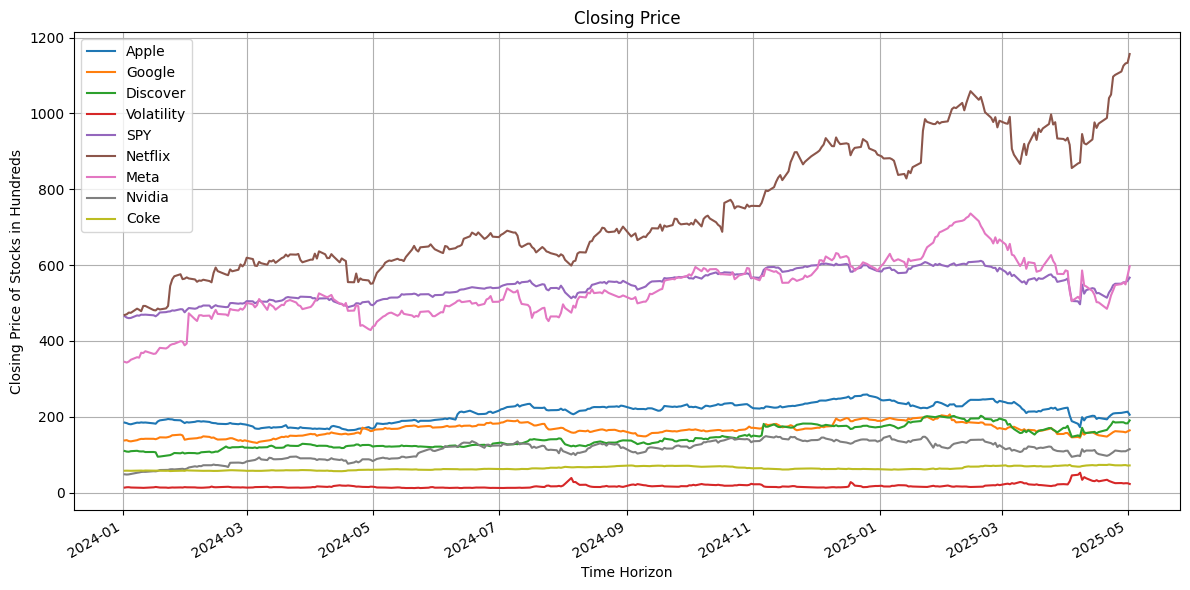

In [9]:
def closing_price(*tickers, labels=None):
    if labels is None:
        labels = [f'Stock {i+1}' for i in range(len(tickers))]

    plt.figure(figsize=(12, 6))

    for df, label in zip(tickers, labels):
        df['Close'].plot(label=label)

    plt.xlabel('Time Horizon')
    plt.ylabel('Closing Price of Stocks in Hundreds')
    plt.title('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

jasons_watchlist = closing_price(apple, google, dfs, vix,
                                 spy, netflix, meta,nvidia, coke,
labels=['Apple', 'Google', 'Discover', 'Volatility', 
        'SPY', 'Netflix', 'Meta','Nvidia','Coke'])

    


In [10]:
current_working = os.getcwd()
pathing = '/key/fred_key.json'

In [11]:
key_path  = os.path.join(current_working+ pathing)

with open(key_path) as f:
    config = json.load(f)

key = config['fred_key']

fred = Fred(api_key=key)

sp500 = fred.get_series('SP500')
df = pd.DataFrame(sp500).reset_index()
df.rename(columns={'index': 'date', 0: 'price'}, inplace=True)

df = df[df['date'] > '2020-01-01']
date_data = df['date']
price_data = df['price']
price_data = price_data.astype(float)
data = df[round(price_data).apply(lambda x: x % 2 == 0)]
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jabob\\economic-outlook\\working_files/key/fred_key.json'

In [ ]:
def sp500(dates = date_data, price = price_data):
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Correct way to set figure size
    ax1.plot(data['date'], data['price'], color ='red')
    ax1.set_ylabel('SP 500 Price', fontweight= 'bold')
    ax1.set_xlabel('Date Horizon', fontweight = 'bold')
    ax1.set_title('SP500 vs Stocks', fontweight = 'bold')
    ax1.set_yticklabels([f"{y:,.2f}" for y in ax1.get_yticks()])
    ax1.grid(axis = 'y')


sp500()

In [ ]:
def tracking(stock, stock_string):
    stock['Close'].plot()
    stock['calculated_moving'].plot()
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.title(f'closing price and moving average for {stock_string}')
    return plt.show()
    
    
tracking(apple, 'apple')

In [ ]:
apple['Volume']

In [ ]:
mpf.plot(apple['2025-01-01':'2025-01-31'], type=  'candle', volume = True)

In [ ]:
def sending_email_function(user_name_email):
    